##Import packages and images

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import glob

In [2]:
from google.colab import drive # Set up the path (read files in google drive)
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TRAIN_DIR = "./DATASET"
ORG_DIR = "/content/drive/MyDrive/Training_data - Cut"
CLASS = ['Door_number','No_number']

In [11]:
for C in CLASS:
  DEST = os.path.join(TRAIN_DIR,C)

  if not os.path.exists( DEST):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR,C)+"*"):
    SRC = img_path

    shutil.copy(SRC,DEST)

##Model building

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import keras

In [12]:
base_model = InceptionV3(input_shape = (256,256,3), include_top= False)

In [13]:
for layer in base_model.layers:
  layer.trainable = False

In [14]:
X= Flatten()(base_model.output)
X = Dense(units = 2, activation = 'sigmoid')(X)

#Final model
model = Model(base_model.input, X)

#Compile the model
model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy, metrics=['accuracy'])



##Pre-Process data using

In [15]:
train_datagen = ImageDataGenerator(featurewise_center=True, 
                                   rotation_range= 0.4, width_shift_range= 0.3, 
                                   horizontal_flip=True, preprocessing_function= preprocess_input, 
                                   zoom_range=0.4 , shear_range= 0.4 )
train_data = train_datagen.flow_from_directory(directory = "/content/DATASET", target_size = (256,256), batch_size = 36 )

Found 156 images belonging to 2 classes.


In [16]:
train_data.class_indices

{'Door_number': 0, 'No_number': 1}

##Data Visualization

In [17]:
t_img, label =train_data.next()

In [18]:
t_img.shape

(36, 256, 256, 3)

In [19]:
def plotimages(img_arr, label):
  """
  input: image array
  output: plot images
  """
  for idx,img in enumerate(img_arr):
    if idx<=10 :
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


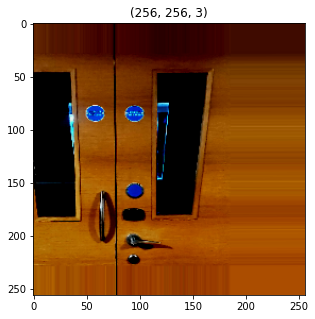

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


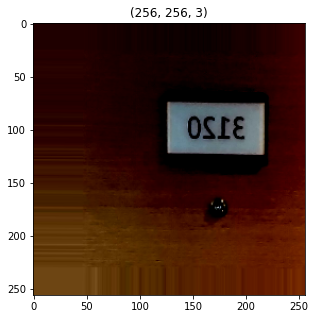

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


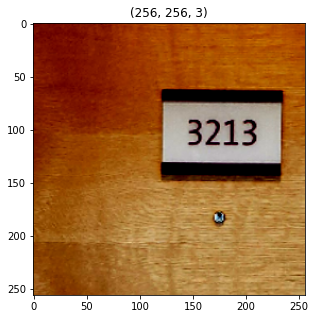

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


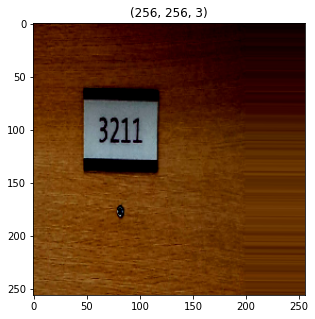

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


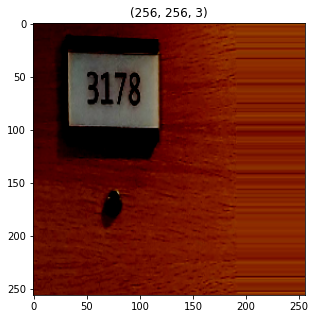

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


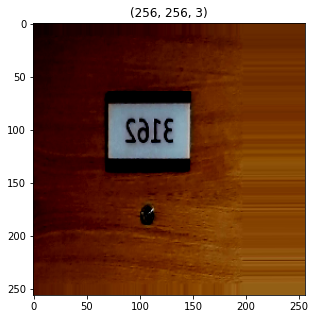

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


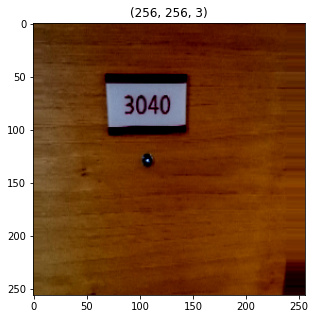

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


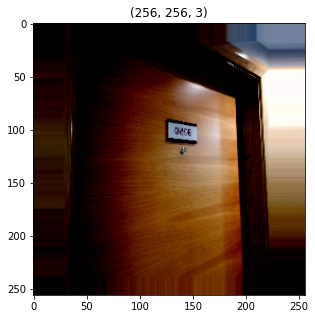

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


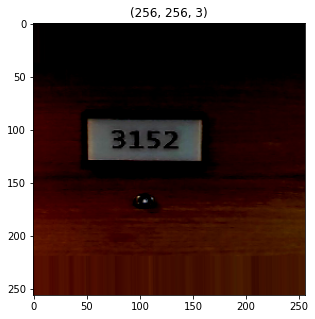

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


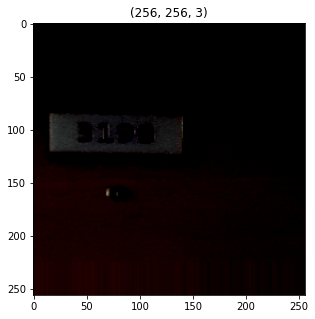

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


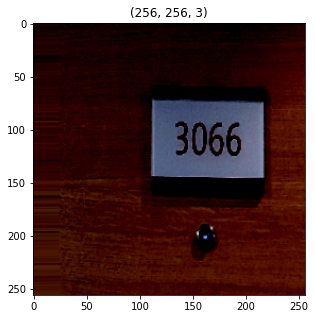

In [20]:
plotimages(t_img, label)

##Model evaluation

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath= "./CNN_model.h5",
                     monitor="accuracy",
                     verbose=1,
                     save_best_only=True)

es = EarlyStopping(monitor="accuracy",
                   min_delta = 0.01,
                   patience=5,
                   verbose=1)

cb= [mc,es]

In [22]:
his = model.fit_generator(train_data, steps_per_epoch=10, epochs=30, callbacks=cb)

Epoch 1/30
 5/10 [==============>...............] - ETA: 26s - loss: 1.9324 - accuracy: 0.7372WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 300 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: accuracy improved from -inf to 0.73718, saving model to ./CNN_model.h5
10/10 [==============================] - 39s 2s/step - loss: 1.9324 - accuracy: 0.7372


In [30]:
scores = model.evaluate(t_img, label)
scores

2/2 [==============================] - 7s 574ms/step - loss: 1.8423 - accuracy: 0.9722


[1.8423140048980713, 0.9722222089767456]

##Validate model

In [23]:
from keras.models import load_model
model = load_model("/content/CNN_model.h5")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image has No_number


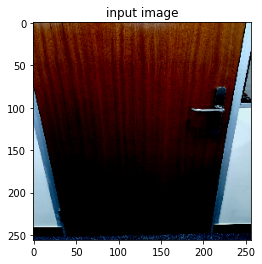

In [26]:
from matplotlib import image
# path for the image to see prediction result
path="/content/drive/MyDrive/Testing_data - Cut/zero.jpeg" #copy path of image from test1 folder
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i= preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred==0:
  print("The image has Door_number")
else:
  print("The image has No_number")

#Plot the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.axis=False
plt.show()

